# Assignment1-R

# 1 Assignment 1 - Data preprocessing and manual introspection

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
default_figsize=(8, 6)
default_alpha = .05
display(Markdown(f'### Significance level: {default_alpha}'))

/home/bogdan/lnu/4dv660/ml-practice/venv/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### Significance level: 0.05

Display the number of features and their names:

In [2]:
df = pd.read_csv('../ISLR/data/Wage.csv', index_col=[0])

In [3]:
print(len(df.columns))
print(df.columns)

11
Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')


Delete the feature ‘logwage’ and display the number of features and their names again:

In [4]:
df.drop('logwage', axis=1, inplace=True)
print(len(df.columns))
print(df.columns)

10
Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'wage'],
      dtype='object')


Display the number of data points:

In [5]:
print(len(df))

3000


Display the data in a table (subset of rows is sufficient):

> Top 20 rows are shown.

In [6]:
n = 20
display(df.info(verbose=True))
display(df.head(n))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   wage        3000 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 257.8+ KB


None

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,127.115744
450601,2009,44,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,169.528538
377954,2008,30,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,111.720849
228963,2006,41,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,118.884359
81404,2004,52,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,128.680488


Print a statistic summary of the features (year, age, maritl, race, education, region, jobclass, health,
health_ins) and the label (wage):

> Did not output top 5 frequent for non-numeric values.

In [7]:
df.describe(include='all')

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
count,3000.000000,3000.000000,3000,3000,3000,3000,3000,3000,3000,3000.000000
unique,NaN,NaN,5,4,5,1,2,2,2,NaN
top,NaN,NaN,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,NaN
freq,NaN,NaN,2074,2480,971,3000,1544,2142,2083,NaN
mean,2005.791000,42.414667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.703608
std,2.026167,11.542406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.728595
min,2003.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.085537
25%,2004.000000,33.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.383940
50%,2006.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.921507
75%,2008.000000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.680488


**For the numerical features**, check the correlation, i.e., the relation of feature to lable variations.
Therefore, for **each** such feature perform the following steps:
1. Plot the feature against the lable values
2. Test the normality of the feature and lable values
3. Test their correlation using an appropriate test
4. Interprete the results

In [8]:
num_cols = []
nonnum_cols = []
y_feat = 'wage'
for _, col in df.iteritems():
    if col.name == y_feat:
        continue
    if np.issubdtype(col.dtypes, np.number):
        num_cols.append(col)
    else:
        nonnum_cols.append(col)

In [9]:
## Alternative way to do linear regression.
# def lregr_func(x, y):
#     coef = np.polyfit(x,y,1)
#     return np.poly1d(coef)

## Alternative way to calculate confidence interval.
# def conf_interval(actual, y):
#     # a = 1.0 * np.array(y)
#     # n = len(a)
#     # m, se = np.mean(a), scipy.stats.sem(a)
#     # h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#     # return m-h, m+h
#     z = 1.960 # for confidence 0.95
#     s = np.sqrt(np.sum((actual - y) ** 2) / (len(actual) - 2))
#     return z * s / np.sqrt(len(actual))

def fit_lr(x, y):
    X = sm.add_constant(x)
    return sm.OLS(y, X).fit()

def plot_lr(ax, mod_fit, x, alpha):
    X = sm.add_constant(x)
    regr = mod_fit.predict(X)
    ax.plot(x, regr, 'k')
    prediction = mod_fit.get_prediction(X)
    frame = prediction.summary_frame(alpha=alpha)
    zipped = pd.concat([x, frame.mean_ci_lower, frame.mean_ci_upper], axis=1)
    zipped.sort_values(x.name, inplace=True)
    ax.fill_between(zipped[x.name], zipped[frame.mean_ci_lower.name], zipped[frame.mean_ci_upper.name], color='k', alpha=.3)

def plot(x, y, xlab, ylab, mod_fit=None, alpha=default_alpha):
    fig, ax = plt.subplots(figsize=default_figsize)
    ax.plot(x, y, 'yo')
    if mod_fit:
        plot_lr(ax, mod_fit, x, alpha)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.show()

def format_pearsonr(values):
    return f'R = {values[0]}, p < {values[1]}'

def fit_lr_plot_full(x, y, xlab, ylab):
    mod_fit = fit_lr(x, y)
    print(format_pearsonr(scipy.stats.pearsonr(x, y)))
    plot(x, y, xlab, ylab, mod_fit)
    return mod_fit

def pearsonr_ci(x,y,alpha=default_alpha):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = scipy.stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = scipy.stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

def print_pearson_corr(col, y):
    r, r_p2, ci_lower, ci_upper = pearsonr_ci(col, y)
    df = len(y) - 2
    t = r * np.sqrt(df / (1 - r ** 2))
    print(f't = {t}, df = {df}, p-value < {scipy.stats.t.sf(np.abs(t), df)}')
    print(f'Pearson correlation test: r = {r}, p = {r_p2 / 2}')
    print(f'Confidence interval: ', [ci_lower, ci_upper])

def analyze_numcol(col):
    y = df[y_feat]
    x_label = col.name.title()
    y_label = y.name.title()

    display(Markdown(f'### Analyzing "{y_label}" against "{x_label}"\n'
                     '##### Step 1: Plot the feature against the lable values:'))
    mod_fit = fit_lr_plot_full(col, y, x_label, y_label)

    display(Markdown('##### Step 2: Test the normality of the feature and lable values:'))
    print(f'Shapiro-Wilk normality test "{x_label}"', scipy.stats.shapiro(col))
    print(f'Shapiro-Wilk normality test "{y_label}"', scipy.stats.shapiro(y))
    # TODO: add ci_mean confidence interval.
    fig, ax = plt.subplots(figsize=default_figsize)
    sm.qqplot(col, ax=ax, ylabel=x_label, line='r')
    fig.show()
    fig, ax = plt.subplots(figsize=default_figsize)
    sm.qqplot(mod_fit.resid, ax=ax, ylabel=y_label, line='r')
    fig.show()

    display(Markdown('##### Step 3: Perform the Pearson correlation test:'))
    print_pearson_corr(col, y)

### Analyzing "Wage" against "Year"
##### Step 1: Plot the feature against the lable values:

R = 0.06554427797296274, p < 0.0003276777926030086


<IPython.core.display.Javascript object>


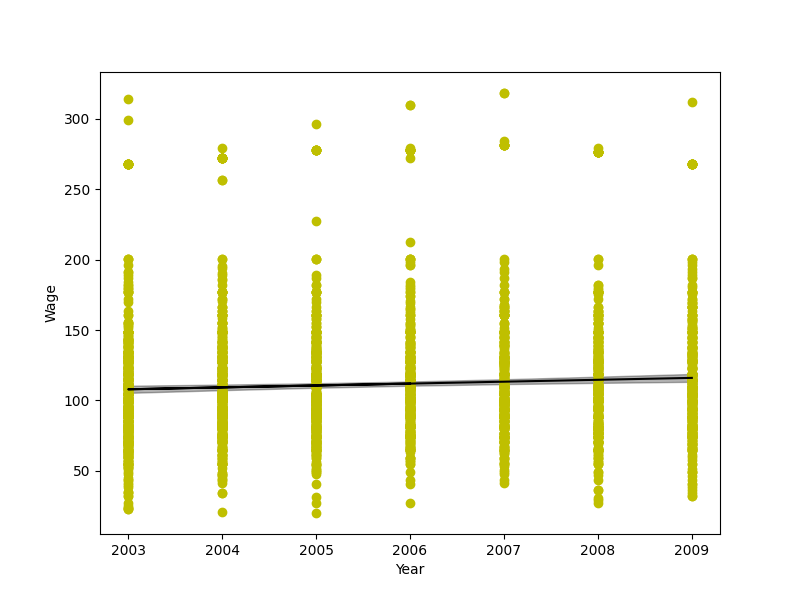

##### Step 2: Test the normality of the feature and lable values:

Shapiro-Wilk normality test "Year" ShapiroResult(statistic=0.9110633730888367, pvalue=9.024160323272959e-39)
Shapiro-Wilk normality test "Wage" ShapiroResult(statistic=0.8795709609985352, pvalue=2.466285297211678e-43)


<IPython.core.display.Javascript object>


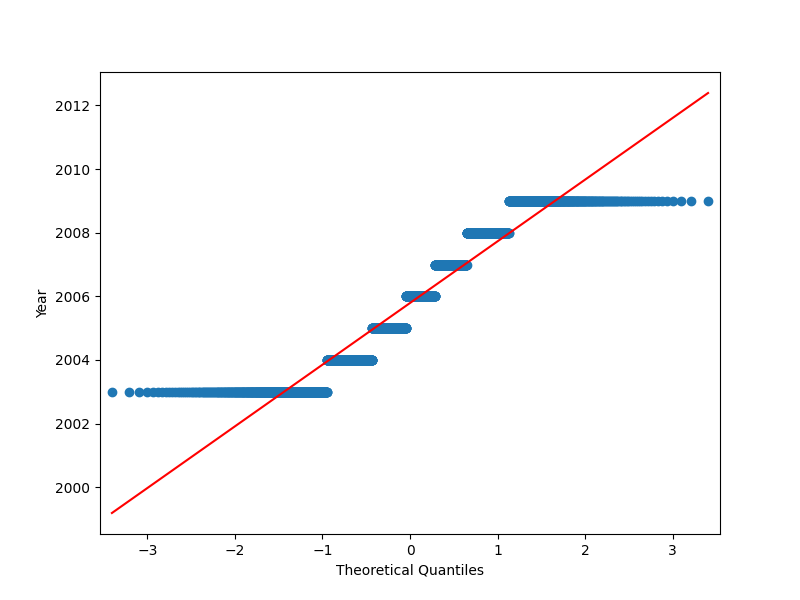

<IPython.core.display.Javascript object>


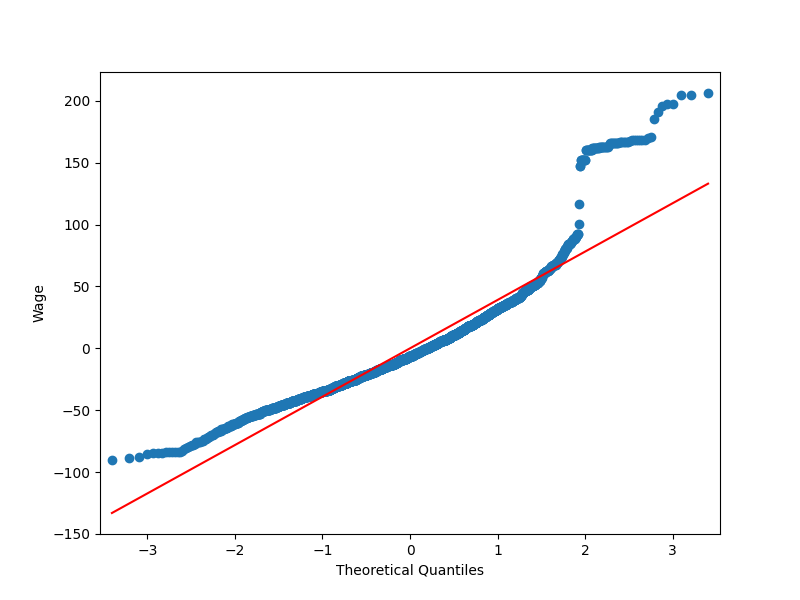

##### Step 3: Perform the Pearson correlation test:

t = 3.596544874993395, df = 2998, p-value < 0.00016383889630237295
Pearson correlation test: r = 0.06554427797296274, p = 0.0001638388963015043
Confidence interval:  [0.029827742378506616, 0.10109365222970776]


### Analyzing "Wage" against "Age"
##### Step 1: Plot the feature against the lable values:

R = 0.19563720156358863, p < 2.9007776751953376e-27


<IPython.core.display.Javascript object>


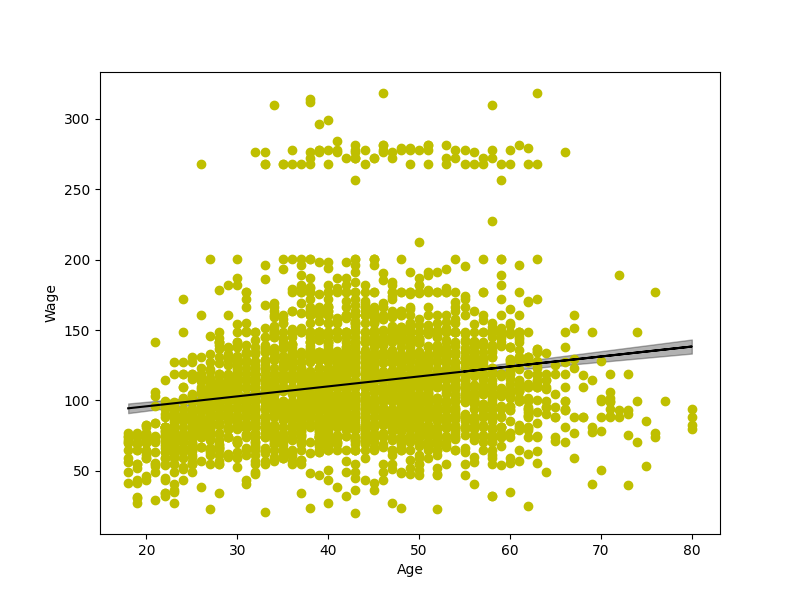

##### Step 2: Test the normality of the feature and lable values:

Shapiro-Wilk normality test "Age" ShapiroResult(statistic=0.9910538792610168, pvalue=9.371995367268848e-13)
Shapiro-Wilk normality test "Wage" ShapiroResult(statistic=0.8795709609985352, pvalue=2.466285297211678e-43)


<IPython.core.display.Javascript object>


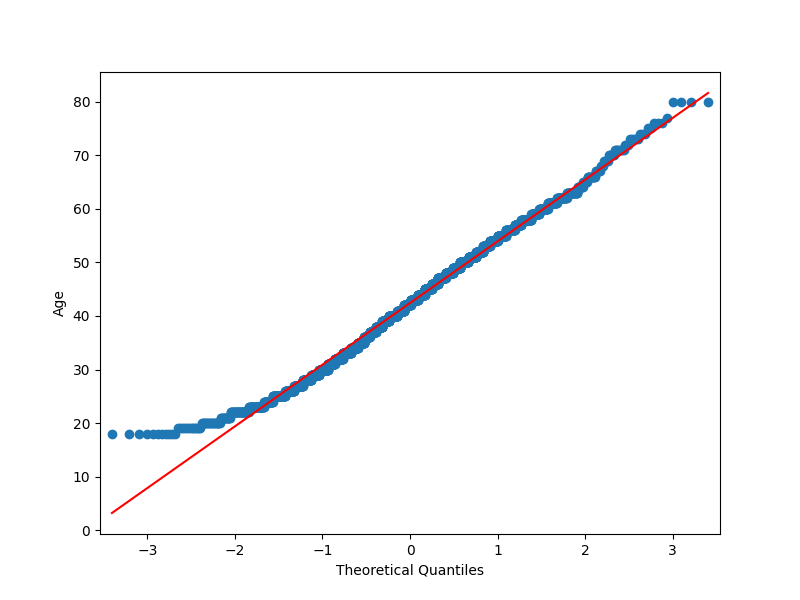

<IPython.core.display.Javascript object>


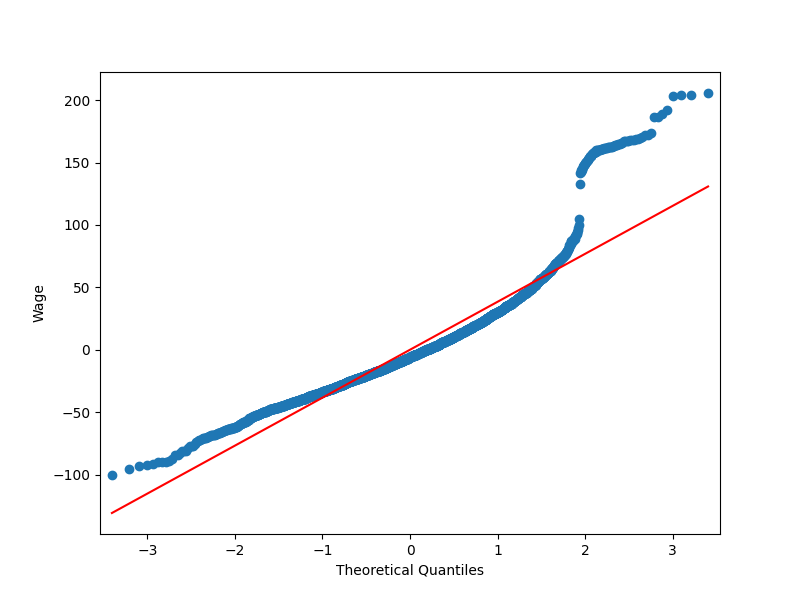

##### Step 3: Perform the Pearson correlation test:

t = 10.922990559821644, df = 2998, p-value < 1.4503888376054628e-27
Pearson correlation test: r = 0.19563720156358863, p = 1.4503888375976688e-27
Confidence interval:  [0.16097773459542805, 0.22981472898857164]


In [10]:
for col in num_cols:
    analyze_numcol(col)

### Step 4. Results interpretation.

There are 3 numeric features: `Wage`, `Age`, and `Year`.
The regression and correlation was done for `Wage` against `Age` and `Wage` against `Year`.

#### `Wage` against `Year`.

First of all, `Year` is ordered categorical data. This means that linear regression might be affected by the non-continuity of the data.

From the plot of `Wage` against `Year` it is hard to tell if there is a correlation in between the two. The mean confidence interval of the linear regression line is small, which might indicate high certainty in the predicted data.

Shapiro-Wilk tests check if a one-dimensional dataset close to a normal distribution (null hypothesis). The $p-values$ for both `Year` and `Wage` is below significance level, meaning the null hypothesis should be rejected in both cases, signifying that `Year` and `Wage` datasets are not normally distributed. This could mean a strong bias in the data.

The Q-Q plot confirms that both `Year` and `Wage` are not plotted along the 45° line, meaning they are not normally distributed:
- `Year` can be seen to have issues because it is categorical data - the data is split in lines parallel to `x` axis;
- `Wage`'s plot shows, that the actual data is slightly larger at first, then is slightly smaller, then steeply goes above the normally distributed values for 2 and 3 quantiles;

Pearson correlation coefficient $r$ is close to 0 (around 0.07), which means there is no correlation between `Wage` and `Year`. Since neither `Year` nor `Wage` are normally distributed, $p-value$ of the Pearson correlation coefficient $r$ is negatively affected, because it relies on data normality. However, the $p-value$ in both cases is below $\alpha$. Given that the $r$ is small, both datasets are not normally distributed, the $p-value$ is small, it can be concluded that there is no correlation between `Wage` and `Year`.

The confidence interval is not large signifying a considerable certainty in the given results.

**Conclusion**: there is no correlation between `Wage` and `Year`.

#### `Wage` against `Age`.

According to the plot of `Wage` against `Age`, there seems to be a small positive correlations between the variables. The mean confidence interval of the linear regression line is small, which might indicate high certainty in the predicted data.

Shapiro-Wilk tests check if a one-dimensional dataset close to a normal distribution (null hypothesis). The $p-values$ for both `Age` and `Wage` is above significance level, meaning the null hypothesis should be rejected in both cases, signifying that `Age` and `Wage` datasets are not normally distributed. This could mean a strong bias in the data.

According to the Q-Q plot for `Age`, `Age` is normally distributed, since the points are plotted along the 45° line. `Wage`'s plot shows that it is not normally distributed: that the actual data is slightly larger at first, then is slightly smaller, then steeply goes above the normally distributed values for 2 and 3 quantiles

Pearson correlation coefficient $r$ is small, but not close to 0 (around 0.19), which means there is a weak correlation between `Wage` and `Age`. Since `Age` is normally distributed, but `Wage` is not, $p-value$ of the Pearson correlation coefficient $r$ is slightly negatively affected, because it relies on data normality. However, the $p-value$ in both cases is below $\alpha$. Given that the $r$ is small, one dataset normally distributed and one not, the $p-value$ is small, it can be concluded that there is a weak positive correlation between `Wage` and `Age`.

The confidence interval is not large signifying a considerable certainty in the given results.

**Conclusion**: there is a small positive correlation between `Wage` and `Age`.

**For the non-numerical features**, analyse the variance (ANOVA), to study differences between
the means of the label values for groups of data points with the same feature value. Therefore, for
**each** such feature perform the following steps:
1. List the possible feature values
2. Plot (box plot) the label values for each group of of data points with the same feature value.
3. Perform the one way ANOVA test
4. Interprete the results
Step 1: List the possible feature values:

In [11]:
def analyze_nonnumcol(col):
    y = df[y_feat]
    x_label = col.name.title()
    y_label = y.name.title()

    display(Markdown(f'### Analyzing "{y_label}" against "{x_label}"\n'
                     '##### Step 1: List the possible feature values:'))
    values = col.unique().tolist()
    print('Unique values:', values)

    display(Markdown('##### Step 2: Plot (box plot) the label values for each group of of data points with the same feature value:'))
    fig, ax = plt.subplots(figsize=default_figsize)
    for i in range(len(values)):
        scatter_y = df.loc[col == values[i], y_feat]
        x = np.random.normal(i + 1, 0.05, size=len(scatter_y))
        ax.plot(x, scatter_y, 'r.', alpha=1)
    df.boxplot(column=y_feat, by=col.name, ax=ax)
    fig.show()

    display(Markdown('##### Step 3. Perform the one-way ANOVA test:'))
    if len(values) > 1:
        anova_table = sm.stats.anova_lm(ols(f'{y_feat} ~ C({col.name})', data=df).fit(), typ=1)
        print(anova_table)
    else:
        print('Cannot run ANOVA because there is only one unique value:', values)

### Analyzing "Wage" against "Maritl"
##### Step 1: List the possible feature values:

Unique values: ['1. Never Married', '2. Married', '4. Divorced', '3. Widowed', '5. Separated']


##### Step 2: Plot (box plot) the label values for each group of of data points with the same feature value:

<IPython.core.display.Javascript object>


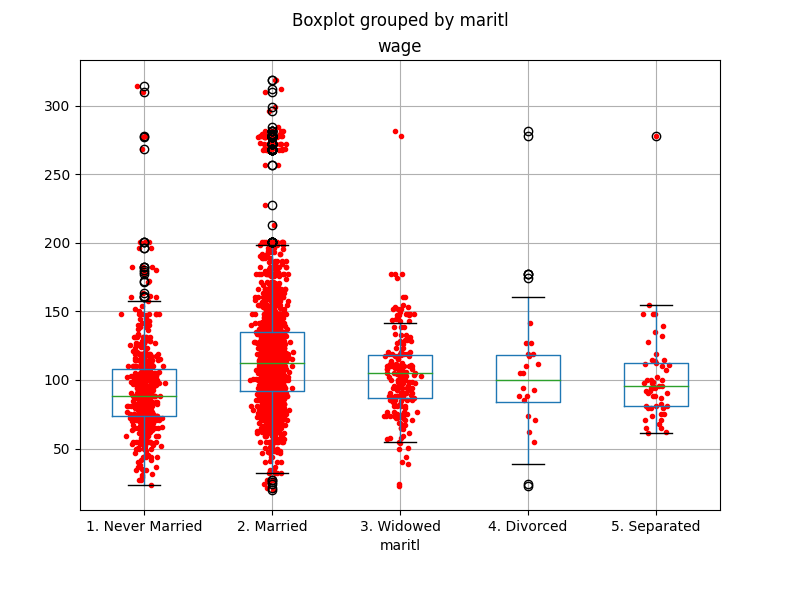

##### Step 3. Perform the one-way ANOVA test:

               df        sum_sq       mean_sq          F        PR(>F)
C(maritl)     4.0  3.631444e+05  90786.091095  55.959585  1.401201e-45
Residual   2995.0  4.858941e+06   1622.351054        NaN           NaN


### Analyzing "Wage" against "Race"
##### Step 1: List the possible feature values:

Unique values: ['1. White', '3. Asian', '4. Other', '2. Black']


##### Step 2: Plot (box plot) the label values for each group of of data points with the same feature value:

<IPython.core.display.Javascript object>


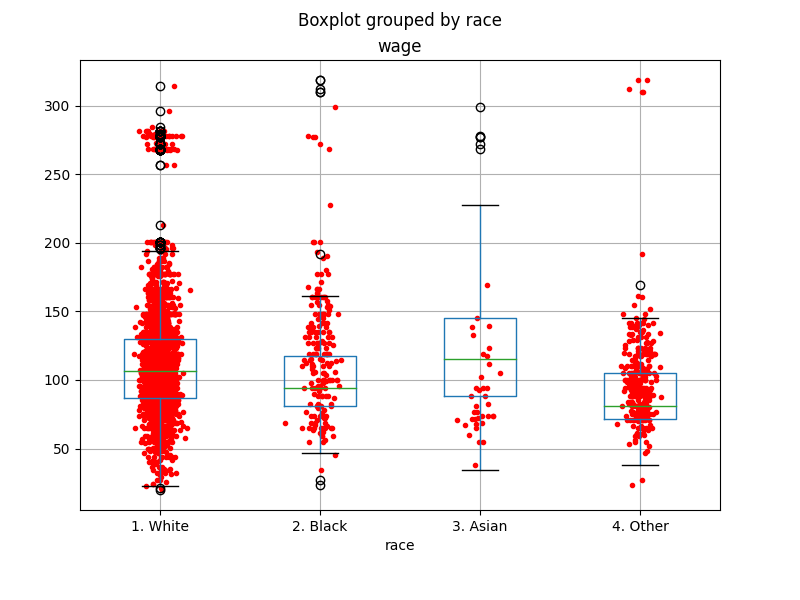

##### Step 3. Perform the one-way ANOVA test:

              df        sum_sq       mean_sq          F        PR(>F)
C(race)      3.0  6.321174e+04  21070.581068  12.236674  5.890230e-08
Residual  2996.0  5.158874e+06   1721.920570        NaN           NaN


### Analyzing "Wage" against "Education"
##### Step 1: List the possible feature values:

Unique values: ['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad', '5. Advanced Degree']


##### Step 2: Plot (box plot) the label values for each group of of data points with the same feature value:

<IPython.core.display.Javascript object>


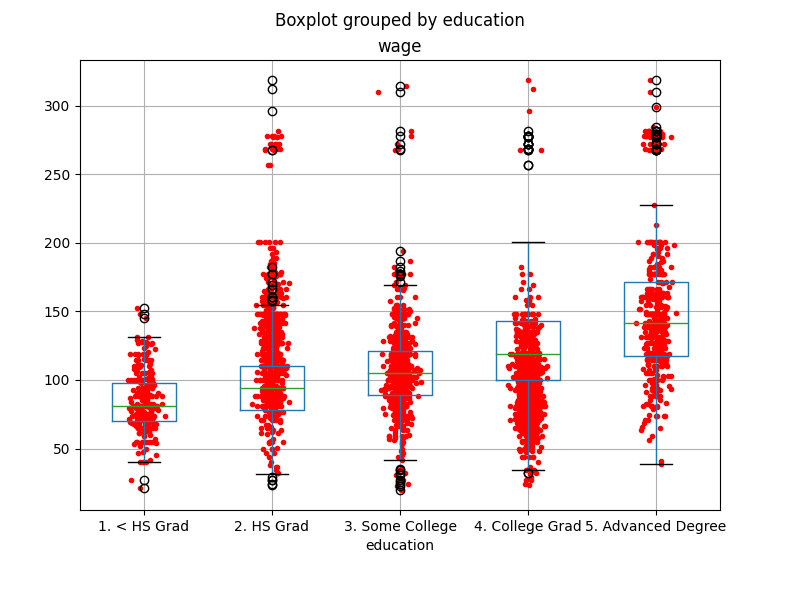

##### Step 3. Perform the one-way ANOVA test:

                  df        sum_sq        mean_sq           F         PR(>F)
C(education)     4.0  1.226364e+06  306591.121218  229.805921  2.915932e-172
Residual      2995.0  3.995721e+06    1334.130646         NaN            NaN


### Analyzing "Wage" against "Region"
##### Step 1: List the possible feature values:

Unique values: ['2. Middle Atlantic']


##### Step 2: Plot (box plot) the label values for each group of of data points with the same feature value:

<IPython.core.display.Javascript object>


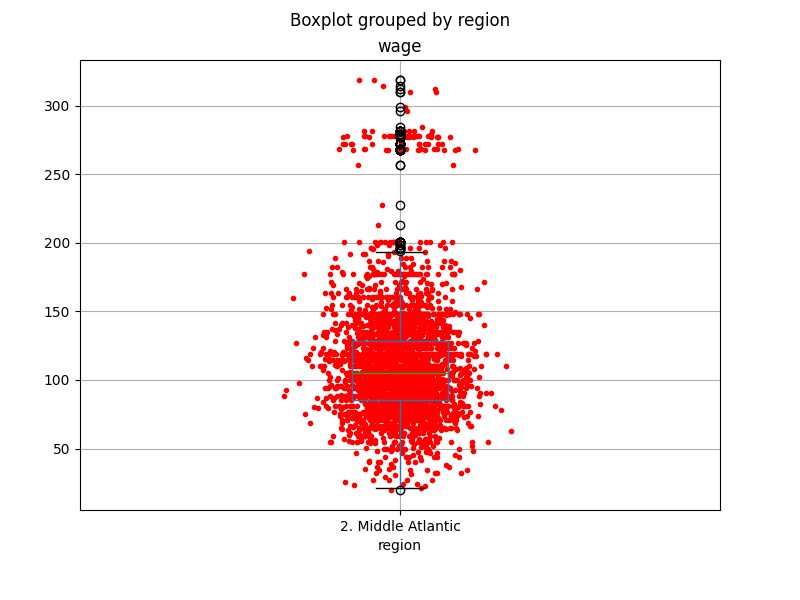

##### Step 3. Perform the one-way ANOVA test:

Cannot run ANOVA because there is only one unique value: ['2. Middle Atlantic']


### Analyzing "Wage" against "Jobclass"
##### Step 1: List the possible feature values:

Unique values: ['1. Industrial', '2. Information']


##### Step 2: Plot (box plot) the label values for each group of of data points with the same feature value:

<IPython.core.display.Javascript object>


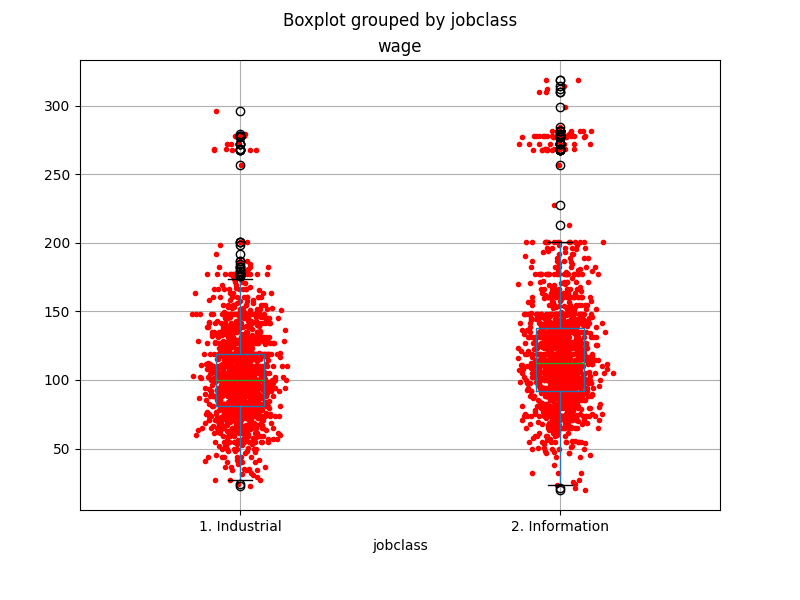

##### Step 3. Perform the one-way ANOVA test:

                 df        sum_sq        mean_sq           F        PR(>F)
C(jobclass)     1.0  2.235384e+05  223538.413339  134.072585  2.308186e-30
Residual     2998.0  4.998547e+06    1667.293981         NaN           NaN


### Analyzing "Wage" against "Health"
##### Step 1: List the possible feature values:

Unique values: ['1. <=Good', '2. >=Very Good']


##### Step 2: Plot (box plot) the label values for each group of of data points with the same feature value:

<IPython.core.display.Javascript object>


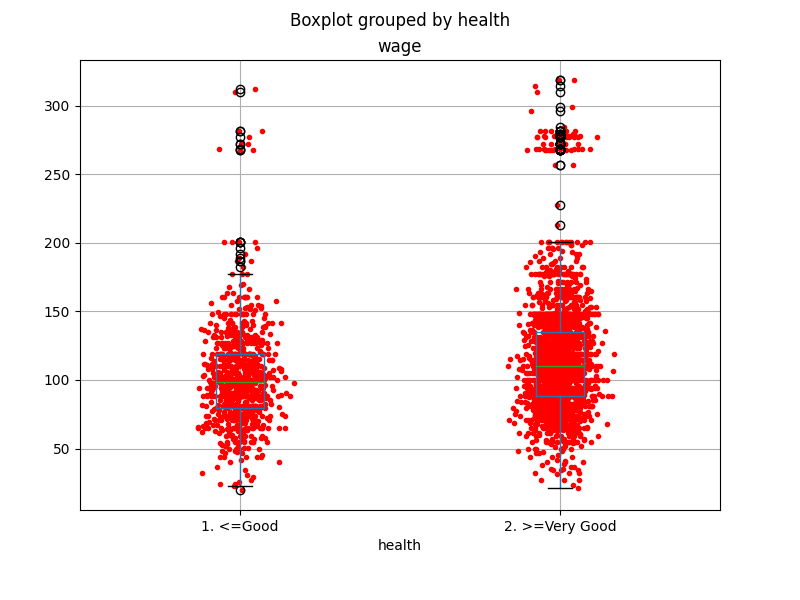

##### Step 3. Perform the one-way ANOVA test:

               df        sum_sq        mean_sq          F        PR(>F)
C(health)     1.0  1.211874e+05  121187.409755  71.226641  4.886404e-17
Residual   2998.0  5.100898e+06    1701.433742        NaN           NaN


### Analyzing "Wage" against "Health_Ins"
##### Step 1: List the possible feature values:

Unique values: ['2. No', '1. Yes']


##### Step 2: Plot (box plot) the label values for each group of of data points with the same feature value:

<IPython.core.display.Javascript object>


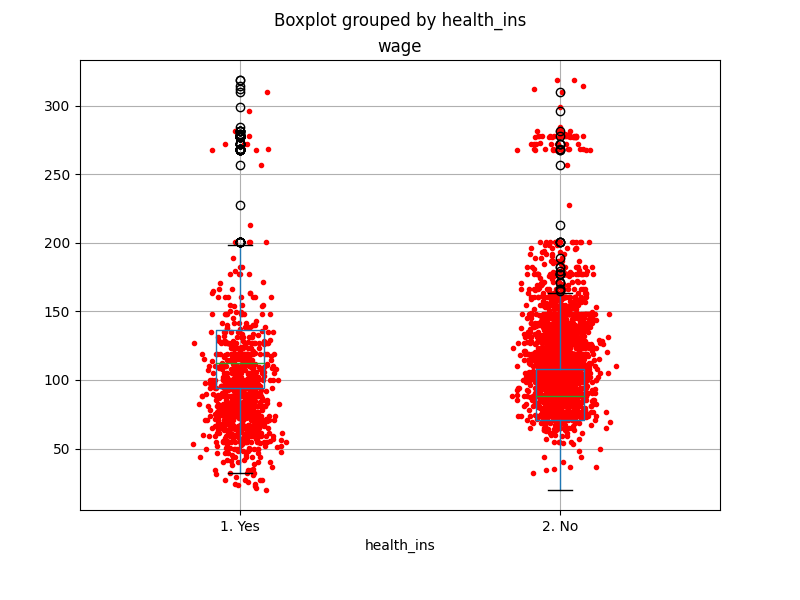

##### Step 3. Perform the one-way ANOVA test:

                   df        sum_sq        mean_sq           F        PR(>F)
C(health_ins)     1.0  4.963846e+05  496384.570620  314.907964  4.465783e-67
Residual       2998.0  4.725701e+06    1576.284589         NaN           NaN


In [12]:
for col in nonnum_cols:
    analyze_nonnumcol(col)

### Step 4. Results interpretation.

There are 7 non-numerical (categorical) features: `maritl`, `race`, `education`, `region`, `jobclass`, `health`, `health_ins`.

`wage` is analyzed against every one of them.

#### `wage` against `maritl`.

There are 5 categories in `maritl`: `['1. Never Married', '2. Married', '4. Divorced', '3. Widowed', '5. Separated']`.

It can be seen from the chart that the data in almost all categories (except for slight upper skew for `Widowed` and minimum (lower whisker) skewed higher for `Separated`) are almost normally distributed. The means for all categories are close and are in 85 - 115 `wage` range. The 1st and 3rd quartiles are 10 - 20 away from the means for almost all categories (except for `Married`, which has higher, around 25 difference).

The data is not split between the categories equally with `Never Married` and `Married` having the most data. In general, the more data there is the more outliers and the higher the difference between the whiskers.

The ANOVA test's $p-value$ is below the significance level, which signifies that the means are different, which is confirmed by the chart. The F-statistic is not very large which means not very large difference between the means.

**Conclusion**: There is a difference between the means (according to the chart and ANOVA test), but the data is split unequally between the categories and the difference between the means is not large. This could signify a weak linear dependency between `wage` and `maritl`.

#### `wage` against `race`.

There are 4 categories in `race`: `['1. White', '3. Asian', '4. Other', '2. Black']`.

It can be seen from the chart that the data is almost normally distributed in `White` and `Asian` categories. In `Black` and `Other` the mean is skewed to the bottom and the means are lower, especially in `Other`. The mean for `White` is higher and mean for `Asian` is the highest (around 115 - 120). The difference between 1st and 3rd quartiles for categories except `Asian` are 30 - 40. The difference between 1st and 3rd quartiles in `Asian` is more than 50.

The data is not split between the categories equally with `White` and `Other` having the most data. The most outliers are present in `White` and `Black` categories. Interestingly, the largest difference between the minimum and maximum values (whiskers) is the largest for `Asian` category with this category having the least data.

The ANOVA test's $p-value$ is below the significance level, which signifies that the means are different, which is confirmed by the chart. The F-statistic is not very large which means not very large difference between the means.

**Conclusion**: There is a difference between the means (according to the chart and ANOVA test), but the data is split unequally between the categories and the difference between the means is considerable. This could signify a certain dependency between `wage` and `race`, which can be biased.

#### `wage` against `education`.

There are 5 categories in `race`: `['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad', '5. Advanced Degree']`. The order is important since it is used during the explanation.

It can be seen from the chart that the data is almost normally distributed for all categories. Slightly low mean is observed for `< HS Grad`. The difference between the 1st and 3rd quantile is getting larger from `< HS Grad` (around 25) to `Advanced Degree` (more than 50).

The data is split relatively equally between the categories. The outliers are also equally distributed between the categories. The difference between the minimum and maximum values (whiskers) is getting larger from `< HS Grad` (around 90) to `Advanced Degree` (around 190). The lower whiskers are on relatively same level, though.

The ANOVA test's $p-value$ is below the significance level, which signifies that the means are different, which is confirmed by the chart. The F-statistic is not very large which means not very large difference between the means.

**Conclusion**: There is a significant difference between the means (according to the chart and ANOVA test), the data is split equally between the categories, but the lower whiskers (minimum) are on relatively the same level. There is a considerable linear dependency between `wage` and `education`, which can be affected by similar minimums for all the categories.

#### `wage` against `region`.

There is only 1 category in `region` - `2. Middle Atlantic`. This makes ANOVA analysis impossible.

The boxplot shows that the data is almost normally distributed with a very slight lower skew of the mean, but there are a lot of outliers.

**Conclusion**: It is impossible to know if there is any dependency between `wage` and `region`, because there is only one category, but the data is normally distributed.

#### `wage` against `jobclass`.

There are only 2 categories in `jobclass`: `['1. Industrial', '2. Information']`.

It can be seen from the chart that the data is almost normally distributed for both categories. The mean and 1st and 3rd quartiles are 10 - 20 higher for `Information` category, but its mean is slightly lowered. The difference between the 1st and 3rd quartiles is larger in `Information` category and is almost 50

The data is split relatively equally between the categories. There are more outliers in `Information` category. The difference between the minimum and maximum values (whiskers) is larger for `Information` (around 180) compared to `Industrial` (around 150). The lower whiskers are on relatively same level, though.

The ANOVA test's $p-value$ is below the significance level, which signifies that the means are different, which is confirmed by the chart. The F-statistic is not very large which means not very large difference between the means.

**Conclusion**: There is a certain difference between the means (according to the chart and ANOVA test), the data is split equally between the categories, but the lower whiskers (minimum) are on relatively the same level. There is a certain linear dependency between `wage` and `jobclass`, which can be affected by similar minimums for both categories.

#### `wage` against `health`.

There are only 2 categories in `health`: `['1. <=Good', '2. >=Very Good']`.

_**The boxplot is very similar to `wage` against `jobclass`.**_

It can be seen from the chart that the data is almost normally distributed for both categories. The mean and 1st and 3rd quartiles are 10 - 20 higher for `>=Very Good` category, but its mean is slightly lowered. The difference between the 1st and 3rd quartiles is larger in `>=Very Good` category and is almost 50

The data is split relatively equally between the categories. There are more outliers in `>=Very Good` category. The difference between the minimum and maximum values (whiskers) is larger for `>=Very Good` (around 180) compared to `<=Good` (around 150). The lower whiskers are on relatively same level, though.

The ANOVA test's $p-value$ is below the significance level, which signifies that the means are different, which is confirmed by the chart. The F-statistic is not very large which means not very large difference between the means.

**Conclusion**: There is a certain difference between the means (according to the chart and ANOVA test), the data is split equally between the categories, but the lower whiskers (minimum) are on relatively the same level. There is a certain linear dependency between `wage` and `health`, which can be affected by similar minimums for both categories.

#### `wage` against `health_ins`.

There are only 2 categories in `health_ins`: `['2. No', '1. Yes']`.

It can be seen from the chart that the data is almost normally distributed for both categories. The mean and 1st and 3rd quartiles are around 25 higher for `Yes` category, but its mean is slightly lowered. The difference between the 1st and 3rd quartiles is larger in `Yes` category and is almost 50

The data is split relatively equally between the categories. There are more outliers in `No` category. The difference between the minimum and maximum values (whiskers) is larger for `Yes` (around 170) compared to `No` (almost 150). The `Yes` category's lower whisker is slightly higher than for the `No` category.

The ANOVA test's $p-value$ is below the significance level, which signifies that the means are different, which is confirmed by the chart. The F-statistic is not very large which means not very large difference between the means.

**Conclusion**: There is a large difference between the means (according to the chart and ANOVA test), the data is split equally between the categories. There is a considerable linear dependency between `wage` and `health_ins`.

### General conclusion.

The linear dependency of `wage` seems to be the strongest against `health_ins`. Considerable dependency is against `education`. There is a certain dependency against `jobclass` and `health` separately. Interestingly, the boxplot looked very similarly for `jobclass` and `health`. It is unclear if there is a significant dependency against `maritl` and `race` separately. `region` has only one category, so it is unknown if there is any dependency.